# The Goal

1) The goal is to predict the burned area of forest fires, in the northeast region of Portugal using temperature, relative humidty, wind, and rain data. 

2) The goal is to predict the burned area of forest fires, in the northeast region of Portugal using FFMC, DMC, DC, and ISI indices. 

# Setup

In [1]:
# Common imports
import numpy as np
import pandas as pd

# Scikit-Learn
import sklearn

# To plot data
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Get the data

In [2]:
# Data is in the project folder
forest_fires = pd.read_csv('forestfires.csv')

forest_fires.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


#### 1. X : x-axis spatial coordinate within Montesinho park map
#### 2. Y : y-axis spatial coordinate within Montesinho park map
#### 3. month : month ofthe year: "jan" to "dec"
#### 4. day : day of the week: "mon" to "sun"
#### 5. FFMC : FFMC index from the FWI system
#### 6. DMC : DMC index from the FWI system
#### 7. ISI : ISI index from the FWI system
#### !8. temp : temperature in Celsius degrees
#### !9. RH : relative humidity in %
#### !10. wind : wind speen in km/h
#### !11. rain : outside rain in mm/m2
#### 12. area : the burned area of the forest (in ha)

In [3]:
forest_fires.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [4]:
forest_fires.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


<function matplotlib.pyplot.show(*args, **kw)>

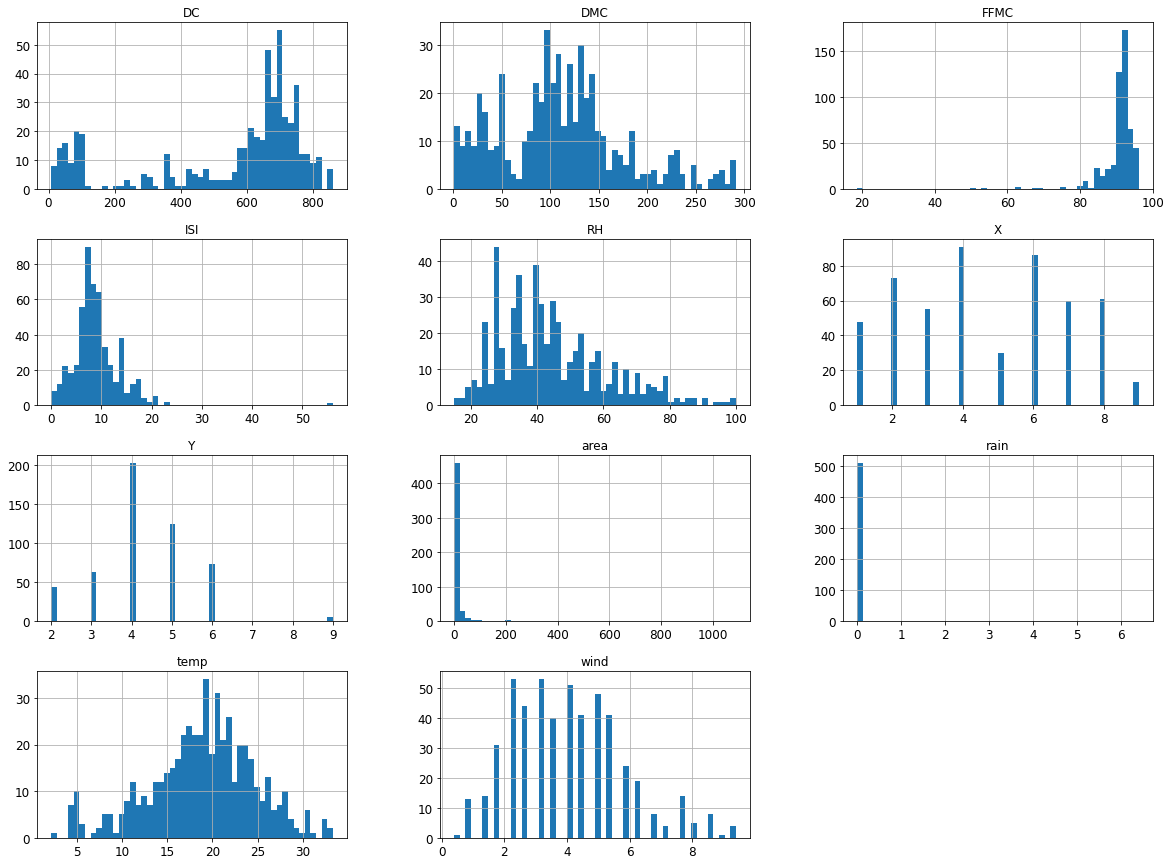

In [5]:
%matplotlib inline
forest_fires.hist(bins=50, figsize=(20,15))
plt.show

# Visualize the data

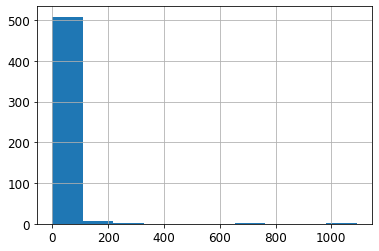

In [6]:
forest_fires["area"].hist()

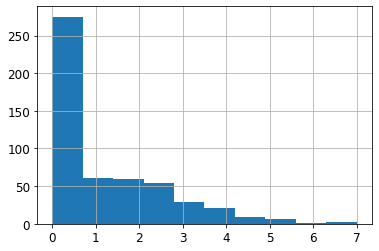

In [7]:
areaLog = np.log(forest_fires['area'] + 1)
areaLog.hist()

In [8]:
forest_fires['areaLog'] = areaLog

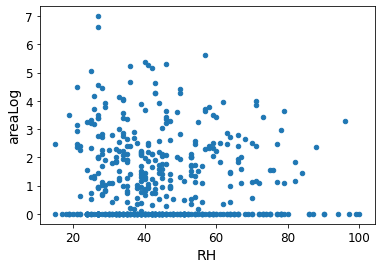

In [9]:
forest_fires.plot(kind="scatter", x="RH", y="areaLog")

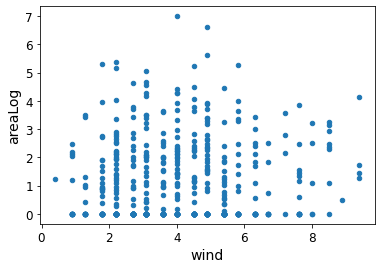

In [10]:
forest_fires.plot(kind="scatter", x="wind", y="areaLog")

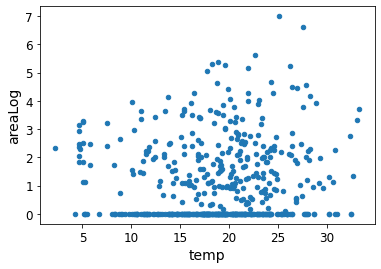

In [11]:
forest_fires.plot(kind="scatter", x="temp", y="areaLog")

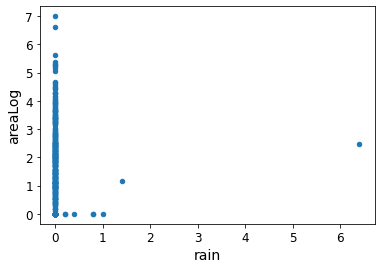

In [12]:
forest_fires.plot(kind="scatter", x="rain", y="areaLog")

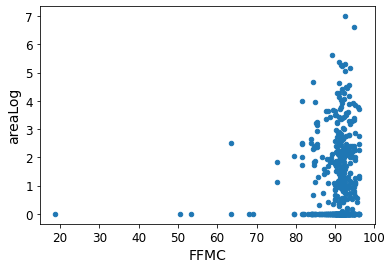

In [13]:
forest_fires.plot(kind="scatter", x="FFMC", y="areaLog")

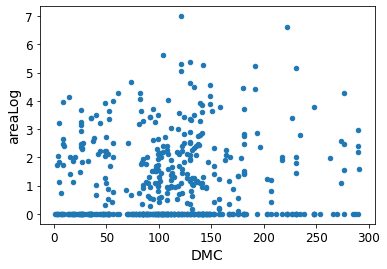

In [14]:
forest_fires.plot(kind="scatter", x="DMC", y="areaLog")

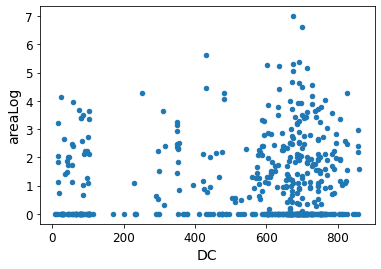

In [15]:
forest_fires.plot(kind="scatter", x="DC", y="areaLog")

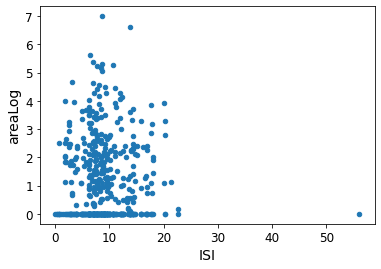

In [16]:
forest_fires.plot(kind="scatter", x="ISI", y="areaLog")

# 1. Using only temperature, relative humidity, wind, and rain to predict burning area

MultiRegression - Linear or Logrithmic or Decision Trees?

## Creating a Training and Testing Set (80%/20% of data)

In [17]:
# Using only meteorological data
forest_fires_meteoro = forest_fires.drop(['X', 'Y', 'month', 'day', 'area', 'FFMC', 'DMC', 'DC', 'ISI'], axis=1)

In [18]:
np.random.seed(42)

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [19]:
train_set, test_set = split_train_test(forest_fires_meteoro, 0.2)
print("Train Set Size: " + str(len(train_set)))
print("Test Set Size: " + str(len(test_set)))

Train Set Size: 414
Test Set Size: 103


In [20]:
print(train_set.shape, test_set.shape)

(414, 5) (103, 5)


In [21]:
train_set.head()

,temp,RH,wind,rain,areaLog
320,18.9,34,7.2,0.0,3.565581
329,23.5,27,4.0,0.0,1.465568
173,17.7,39,2.2,0.0,1.403643
272,20.2,47,4.0,0.0,1.408545
497,32.3,27,2.2,0.0,2.752386


In [22]:
test_set.head()

,temp,RH,wind,rain,areaLog
304,11.3,94,4.9,0.0,0.000000
501,21.6,65,4.9,0.8,0.000000
441,25.5,29,1.8,0.0,0.802002
153,20.1,47,4.9,0.0,0.900161
503,29.2,30,4.9,0.0,1.081805


In [23]:
X_train_val = train_set.iloc[:, :-1] # First column to second last column
Y_train_val = train_set.iloc[:, 4] # Last column: areaLog

X_test = test_set.iloc[:, :-1]
Y_test = test_set.iloc[:, 4]

print(X_train_val.shape, X_test.shape, Y_train_val.shape, Y_test.shape)

(414, 4) (103, 4) (414,) (103,)


## Start with a Simple Linear Regression:

In [24]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X_train_val, Y_train_val)

LinearRegression()

In [25]:
# Predict(temp, RH, wind, rain)
predict_fire_area = regr.predict([[11.3, 94, 4.9, 0]])
print(predict_fire_area)

[1.02133695]


In [26]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

y_pred = (regr.predict(X_train_val))

mse = mean_squared_error(Y_train_val, y_pred)
rmse = np.sqrt(mse)
print(rmse)

score = explained_variance_score(Y_train_val, y_pred)
print(score)

1.3751704698059328
0.004507066706276097


From the Root Mean Squared Error and the Score, we can see that Linear Regression is not the best model to use for this problem.

## Let's Try a Decision Tree Model:

Decision Tree Models are good for finding complex nonlinear relationships in the data.

In [27]:
from sklearn.tree import DecisionTreeRegressor

tree_regr = DecisionTreeRegressor()
tree_regr.fit(X_train_val, Y_train_val)

DecisionTreeRegressor()

In [28]:
y_pred = (tree_regr.predict(X_train_val))

tree_mse = mean_squared_error(Y_train_val, y_pred)
tree_rmse = np.sqrt(tree_mse)
print(tree_rmse)

tree_score = explained_variance_score(Y_train_val, y_pred)
print(tree_score)

0.31390457021520757
0.9481295060935566


This seems to perform a lot better than Linear Regression but it could be that the Decission Tree is overfitting the data. To see if this is true, we will use Cross-Validation.

In [29]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_regr, X_train_val, Y_train_val, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print("scores:", scores)
    print("Mean:", scores.mean())
    print("Standard Deviation:", scores.std())
    
display_scores(tree_rmse_scores)

scores: [1.3572754  2.03514592 1.84123777 2.10730129 2.10458437 1.84916543
 1.97840665 1.83713991 1.61603612 2.05615504]
Mean: 1.8782447901975587
Standard Deviation: 0.22673026771337304


It seems that the Decission Tree is indeed overfitting and is a worse model choice than Linear Regression!

Let's see Linear Regression's Cross-Validation Scores just to compare:

In [30]:
scores = cross_val_score(regr, X_train_val, Y_train_val, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-scores)

display_scores(lin_rmse_scores)

scores: [1.24899176 1.58884679 1.3034112  1.18765336 2.41432538 1.44977533
 1.31073897 1.67742545 1.12381765 1.32261588]
Mean: 1.4627601770345444
Standard Deviation: 0.35665524704419244


This confirms our suspisons that the Decission Tree is overfitting the data and actually performs worse than our Linear Regression model! 

## Let's Try a Random Forest Model:

In [31]:
from sklearn.ensemble import RandomForestRegressor

forest_regr = RandomForestRegressor()
forest_regr.fit(X_train_val, Y_train_val)

RandomForestRegressor()

In [32]:
y_pred = (forest_regr.predict(X_train_val))

forest_mse = mean_squared_error(Y_train_val, y_pred)
forest_rmse = np.sqrt(forest_mse)
print(forest_rmse)

forest_score = explained_variance_score(Y_train_val, y_pred)
print(forest_score)

0.6150875698304122
0.80125005709477


In [33]:
scores = cross_val_score(forest_regr, X_train_val, Y_train_val, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-scores)

display_scores(forest_rmse_scores)

scores: [1.22732038 1.6765468  1.42463563 1.31746799 1.70811314 1.66443528
 1.37915845 1.80456617 1.1629122  1.42643053]
Mean: 1.4791586577376694
Standard Deviation: 0.20902893960128968


The Random Forest Model seems to be a bit better than our Linear Regression Model and our Decission Tree Model. 

# 2. Using only Fire Wether Index Data Including FFMC, DMC, DC, and ISI indices: 

In [34]:
# Using only FWI data
forest_fires_FWI = forest_fires.drop(['X', 'Y', 'month', 'day', 'area', 'temp', 'RH', 'wind', 'rain'], axis=1)

In [35]:
train_set_FWI, test_set_FWI = split_train_test(forest_fires_FWI, 0.2)
print("Train Set Size: " + str(len(train_set)))
print("Test Set Size: " + str(len(test_set)))

Train Set Size: 414
Test Set Size: 103


In [36]:
print(train_set_FWI.shape, test_set_FWI.shape)

(414, 5) (103, 5)


In [37]:
train_set_FWI.head()

,FFMC,DMC,DC,ISI,areaLog
77,87.6,52.2,103.8,5.0,0.000000
350,92.1,99.0,745.3,9.6,1.549688
443,90.7,80.9,368.3,16.8,0.000000
126,87.6,52.2,103.8,5.0,0.000000
264,94.3,167.6,684.4,13.0,2.020222


In [38]:
test_set_FWI.head()

,FFMC,DMC,DC,ISI,areaLog
333,92.1,87.7,721.1,9.5,1.141033
435,90.8,84.7,376.6,5.6,0.000000
233,84.4,73.4,671.9,3.2,4.669646
461,93.7,231.1,715.1,8.4,0.000000
9,92.5,88.0,698.6,7.1,0.000000


In [39]:
X_train_val_FWI = train_set_FWI.iloc[:, :-1] # First column to second last column
Y_train_val_FWI = train_set_FWI.iloc[:, 4] # Last column: areaLog

X_test_FWI = test_set_FWI.iloc[:, :-1]
Y_test_FWI = test_set_FWI.iloc[:, 4]

print(X_train_val_FWI.shape, X_test_FWI.shape, Y_train_val_FWI.shape, Y_test_FWI.shape)

(414, 4) (103, 4) (414,) (103,)


## Linear Regression

In [40]:
regr.fit(X_train_val_FWI, Y_train_val_FWI)

LinearRegression()

In [41]:
y_pred_FWI = (regr.predict(X_train_val_FWI))

mse = mean_squared_error(Y_train_val_FWI, y_pred_FWI)
rmse = np.sqrt(mse)
print(rmse)

score = explained_variance_score(Y_train_val_FWI, y_pred_FWI)
print(score)

1.3762890096250535
0.0072802037298459465


In [48]:
scores = cross_val_score(regr, X_train_val_FWI, Y_train_val_FWI, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-scores)

display_scores(lin_rmse_scores)

scores: [1.51952651 1.15634409 1.5540116  1.26212968 1.16560795 1.49197288
 1.37940204 1.44577095 1.29212849 1.55479891]
Mean: 1.3821693097073087
Standard Deviation: 0.14653331209686482


## Decission Tree

In [42]:
tree_regr.fit(X_train_val_FWI, Y_train_val_FWI)

DecisionTreeRegressor()

In [43]:
y_pred_FWI = (tree_regr.predict(X_train_val_FWI))

tree_mse = mean_squared_error(Y_train_val_FWI, y_pred_FWI)
tree_rmse = np.sqrt(tree_mse)
print(tree_rmse)

tree_score = explained_variance_score(Y_train_val_FWI, y_pred_FWI)
print(tree_score)

1.0146979704747987
0.4603887663709513


In [47]:
scores = cross_val_score(tree_regr, X_train_val_FWI, Y_train_val_FWI, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
    
display_scores(tree_rmse_scores)

scores: [2.00041083 1.54058175 1.80146567 1.6347476  1.37949952 2.03254477
 1.84867269 1.66712069 1.91196687 1.64749268]
Mean: 1.746450307414109
Standard Deviation: 0.1981958301575522


## Random Forest

In [44]:
forest_regr.fit(X_train_val_FWI, Y_train_val_FWI)

RandomForestRegressor()

In [45]:
y_pred_FWI = (forest_regr.predict(X_train_val_FWI))

forest_mse = mean_squared_error(Y_train_val_FWI, y_pred_FWI)
forest_rmse = np.sqrt(forest_mse)
print(forest_rmse)

forest_score = explained_variance_score(Y_train_val_FWI, y_pred_FWI)
print(forest_score)

1.0488537900531325
0.42350406268752316


In [46]:
scores = cross_val_score(forest_regr, X_train_val_FWI, Y_train_val_FWI, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-scores)

display_scores(forest_rmse_scores)

scores: [1.82421437 1.31412159 1.67153101 1.38909946 1.2325013  1.76236602
 1.65981997 1.50977098 1.55955992 1.57004987]
Mean: 1.549303448014999
Standard Deviation: 0.18208871685224318
